## Importing packages

In [ ]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','preprocessing_clustering.R'))
#install_all_packages()
load_library_packages()


In [2]:
dim(df_during_barriers)

[1] 1214    6

## Clustering - Kmodes Fisher

In [3]:
df_during_barriers_dist <- distinct(df_during_barriers)
nrow(df_during_barriers_dist)

[1] 33

### Caliski

<hr />

#### Scanning parameters

In [4]:
source(here('Modules','modules.R'))
nseed <- 1000
nk <- nrow(distinct(df_during_barriers))
# ks_by_seed <- data.frame(matrix(NA, nrow = nseed, ncol = nk-1))
# for (seed in 1:nseed) {
#     calisnki <- c()
#     for (k in 2:nk) {
#         fs <- calisnki_values_kmodes(k, df_during_barriers_dist, 200, seed)[[1]]
#         calisnki <- append(calisnki, fs)
#     }

#     ks_by_seed[seed, ] <- calisnki
# }

# write.csv(
#     ks_by_seed,
#     "calisnki_kmodes_or_barriers.csv", row.names = FALSE
# )

#### Results

In [5]:
cal <- read.csv("calisnki_kmodes_or_barriers.csv")
cal[, ncol(cal)+1] <-  seq.int(nrow(cal))
colnames(cal) <- append(2:nrow(distinct(df_during_barriers)), "seed")
head(cal)

,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,seed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>
1,7.233333,94.09091,35.64583,212.3333,243.00000,416.0000,13.000000,363.000000,181.44444,10.46897,...,3.7333333,0.6048000,1.7076923,1.6296296,0.4615385,0.19098143,0.04266667,0.010322581,NA,1
2,53.142857,55.38462,971.50000,665.0000,345.60000,111.2222,460.714286,10.026316,296.44444,50.60000,...,2.7179487,5.8240000,0.4165103,0.9971510,0.2971429,0.08578638,0.13333333,0.051612903,NA,2
3,119.490909,1260.00000,460.77778,223.0000,379.80000,888.3333,339.285714,25.772727,78.79630,17.60000,...,3.6000000,0.2458537,0.6213018,0.0767841,0.1530612,0.05793103,0.13333333,0.004962779,NA,3
4,33.932432,172.50000,129.80952,235.6667,66.82500,227.5000,15.000000,22.071429,92.85185,226.60000,...,4.0000000,0.2868293,0.2138837,0.2666667,0.1600000,0.08275862,0.26666667,0.014162077,NA,4
5,52.565217,124.61538,153.59259,374.5000,345.60000,335.8333,9.461153,483.000000,16.35556,338.80000,...,0.9466667,0.5936000,0.1857411,0.2370370,0.3296703,0.57931034,0.02666667,0.002580645,NA,5
6,62.837838,92.64706,309.33333,693.0000,40.70769,192.8333,10.837438,8.689655,126.50000,2.80000,...,0.8133333,1.2923077,0.5353846,0.2529359,0.5054945,0.22281167,0.05333333,0.044665012,NA,6


####  Best K and best seed by highest sample mean

In [6]:
print("Best K")
best_K_kmodes <- match(max(apply(cal, 2, mean)[1:(nk-2)]), apply(cal, 2, mean)) + 1
print(best_K_kmodes)
print("Best Seed")
best_seed_kmodes <- match(max(cal[, best_K_kmodes-1]), cal[, best_K_kmodes-1])
print(best_seed_kmodes)
print("Calisnki")
print(max(cal[, best_K_kmodes-1]))

[1] "Best K"
[1] 5
[1] "Best Seed"
[1] 637
[1] "Calisnki"
[1] 2226


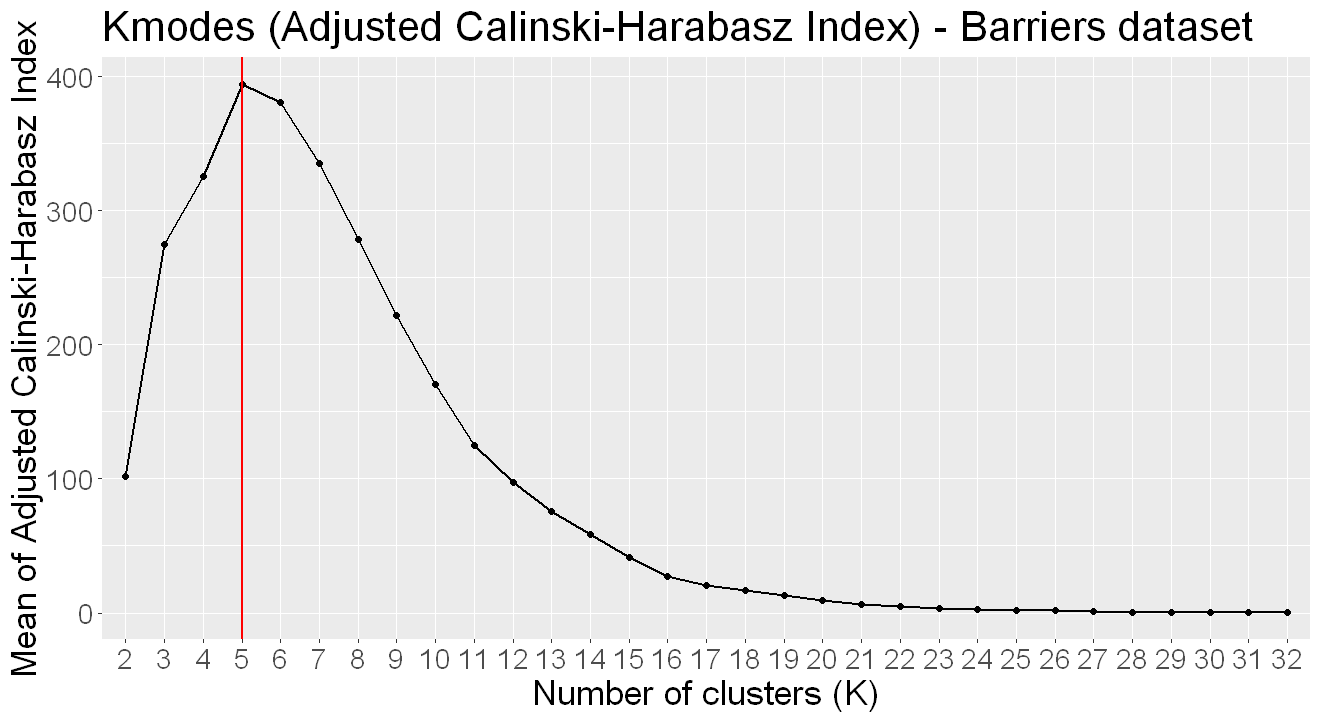

In [23]:
means_df <- data.frame(mean = apply(cal, 2, mean)[1:(nk-2)], k = names(apply(cal, 2, mean)[1:(nk-2)]))
options(repr.plot.width = 11, repr.plot.height =6)
ggplot(data=means_df, aes(x=factor(as.numeric(k)), y=mean, group=1)) +
    geom_line(size=0.7) + geom_point(size=1.5) + 
    geom_vline(xintercept = best_K_kmodes-1, color = "red", size=0.8) + 
    ggtitle("Kmodes (Adjusted Calinski-Harabasz Index) - Barriers dataset") +
    xlab('Number of clusters (K)') +
    ylab('Mean of Adjusted Calinski-Harabasz Index') + 
    theme(text = element_text(size = 21)) 


ggsave(path="graphs", file="metric_evolution_barriers_KC.jpeg", width = 11, height = 6)

## Exploring Kmodes best k

In [8]:
chosen_kmode = kmodes_seed(df_during_barriers_dist, best_K_kmodes, max_iter=200, seed=best_seed_kmodes)
df_during_barriers_dist$cluster <- chosen_kmode$cluster
head(df_during_barriers_dist)

,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard,cluster
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,0,0,0,0,0,2
2,1,0,1,0,0,0,2
3,0,0,0,0,1,0,3
4,1,0,0,0,0,1,2
5,1,1,0,0,0,0,2
6,0,0,0,0,0,1,4


In [9]:
joint <- c(
    'PA_barrier_places_closed_dangerous'='PA_barrier_places_closed_dangerous',
    'PA_barrier_money' = 'PA_barrier_money',
    'PA_barrier_no_interest'='PA_barrier_no_interest',
    'PA_barrier_percieve'='PA_barrier_percieve',
    'PA_barrier_time' = 'PA_barrier_time',
    'PA_barrier_hard' = 'PA_barrier_hard'
)

df_during_barriers <- left_join(df_during_barriers, df_during_barriers_dist, by = joint)
df_during$cluster <- df_during_barriers$cluster
df_during_facilitators$cluster <- df_during_barriers$cluster
nrow(df_during_barriers)

[1] 1214

In [10]:
table(df_during$cluster)


  1   2   3   4   5 
 98 513 120 472  11 

### Profile Plots
<hr />

In [ ]:
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
create_cluster_histograms(
    colors = colors, 
    df = df_during, 
    names = names(df_during[, 20:ncol(df_during)-1]),
    best_k = best_K_kmodes
)
create_cluster_histograms(
    colors = colors, 
    df = df_during_facilitators, 
    names = names(df_during_facilitators[, 1:ncol(df_during_facilitators)-1]),
    best_k = best_K_kmodes
)

#### Modas

In [12]:
chosen_kmode$modes

,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,0,1,1
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,0
5,0,0,0,1,0,1
